# Classification of Income Level

## Load packages and dataset

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [177]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data') 
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [178]:
df.shape

(32560, 15)

The columns are not named clearly. Update the column names.

In [179]:
df.columns = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']     

In [180]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Dataset Preprocessing
- Data type of each column
- Null values and missing values

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [183]:
# Drop fnlwgt column because it is not related
del df['fnlwgt']
df.shape

(32560, 14)

There is no missing values in the dataset. Data types (numerical or object) are reasonable

### Exploratory Data Analysis
- dataset shape
- class weights
- Numerical features distribution
- Categorical features 

Dataset shape and class weights

In [184]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [185]:
df['Income'].value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

There is a class imbalance problem. need to address it. 

In [187]:
t = df.dtypes
print(t)
num_cols = t[t.values=='int64'].index.tolist()
cat_cols = t[t.values=='object'].index.tolist()[:-1]
label = 'Income'
print("numerical columns: ", num_cols)
print('Categorical columns: ', cat_cols)

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object
numerical columns:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


Categorical Columns

In [190]:
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 marital-status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 occupation
 Prof-specialty 

columns: workclass, occupation, native-country has missing values of '?'

In [191]:
for col in cat_cols:
    df[col] = df[col].str.strip()

In [203]:
# Count how many rows has missing values
df.loc[(df['workclass'] == '?') | (df['occupation']=='?') | (df['native-country']=='?')].shape

(2399, 14)

In [204]:
2399/df.shape[0]

0.07367936117936118

about 7% of the data has missing values. So remove the missing values

In [205]:
df = df.loc[(df['workclass'] != '?') & (df['occupation']!='?') & (df['native-country']!='?')]

In [206]:
df.shape

(30161, 14)

Numerical Columns Distribution

<=50K    22653
>50K      7508
Name: Income, dtype: int64


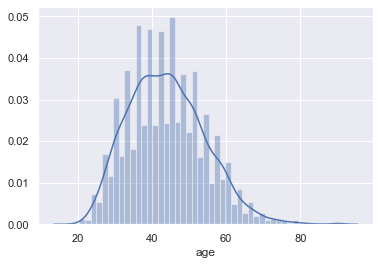

In [215]:
# remove white space characters from income
print(df['Income'].value_counts())
df['Income'] = df['Income'].str.strip()
sns.distplot(df[df['Income']=='>50K']['age'])

In [216]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,10.121216,1091.971984,88.375419,40.931269
std,13.134882,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


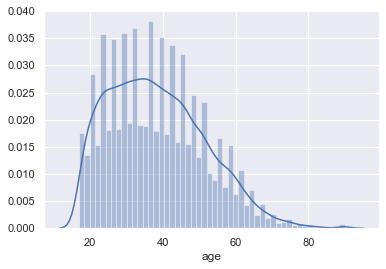

In [217]:
sns.distplot(df['age'])

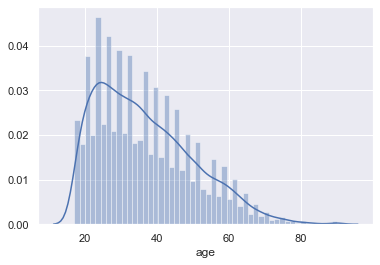

In [218]:
sns.distplot(df[df['Income']=='<=50K']['age'])

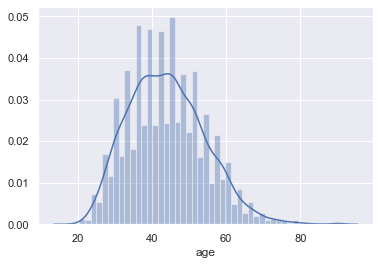

In [219]:
sns.distplot(df[df['Income']=='>50K']['age'])

In [220]:
def num_dist_plot(df, num_col):
    print(num_col)

    print(df[num_col].describe())
    
    sns.distplot(df[num_col])
    plt.show()

    print("When income >50K, the distribution of ", num_col)
    sns.distplot(df[df['Income']=='>50K'][num_col])
    plt.show()

    print("When income <=50K, the distribution of ", num_col)
    sns.distplot(df[df['Income']=="<=50K"][num_col])
    plt.show()


age
count    30161.000000
mean        38.437883
std         13.134882
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


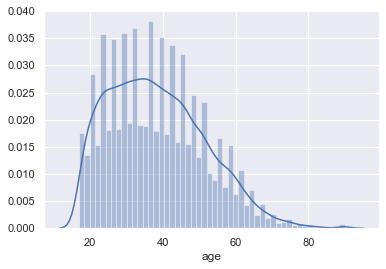

When income >50K, the distribution of  age


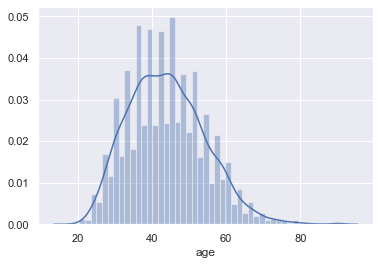

When income <=50K, the distribution of  age


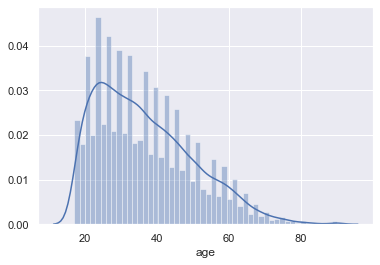

In [221]:
num_dist_plot(df, 'age')

education-num
count    30161.000000
mean        10.121216
std          2.549983
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64


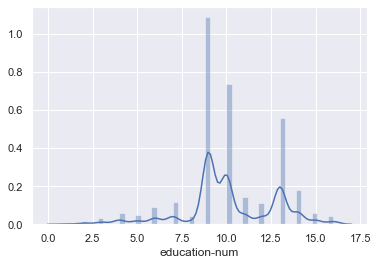

When income >50K, the distribution of  education-num


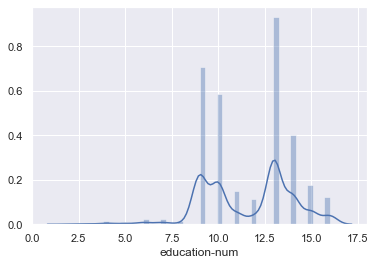

When income <=50K, the distribution of  education-num


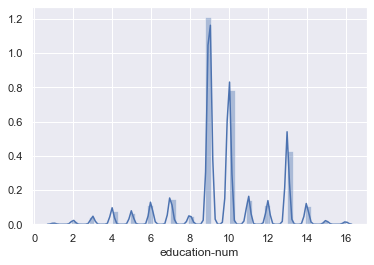

In [222]:
num_dist_plot(df, 'education-num')

In [223]:
df['education-num'].value_counts().sort_index()

1       45
2      151
3      288
4      557
5      455
6      820
7     1048
8      377
9     9840
10    6678
11    1307
12    1008
13    5043
14    1627
15     542
16     375
Name: education-num, dtype: int64

In [224]:
num_dist_plot(df,'capital-gain')

capital-gain
count    30161.000000
mean      1091.971984
std       7406.466659
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

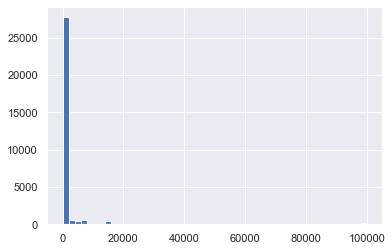

In [225]:
(df['capital-gain']).hist(bins=50)

In [226]:
df2 = df.copy()
df2['capital-gain_cat']=df2['capital-gain'].apply(lambda x: 0 if x == 0 else 1)

In [227]:
df2['capital-gain_cat'].value_counts()

0    27624
1     2537
Name: capital-gain_cat, dtype: int64

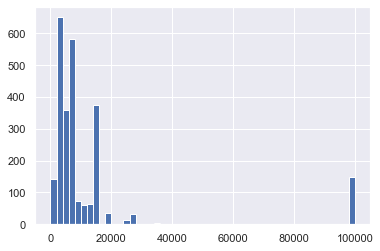

In [228]:
df2[df2['capital-gain_cat']==1]['capital-gain'].hist(bins=50)

In [235]:
df3 = df2[['capital-gain_cat','Income','age']]
df3.groupby(['capital-gain_cat','Income']).count().reset_index().pivot(index='capital-gain_cat', columns='Income', values='age')

Income,<=50K,>50K
capital-gain_cat,,
0,21711,5913
1,942,1595


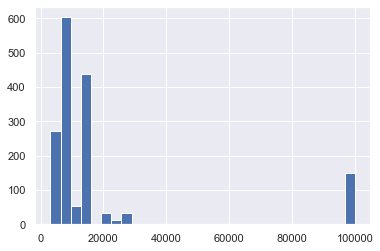

In [249]:
df2.loc[df2['Income']=='>50K'].loc[df2['capital-gain_cat']==1 ]['capital-gain'].hist(bins=30)

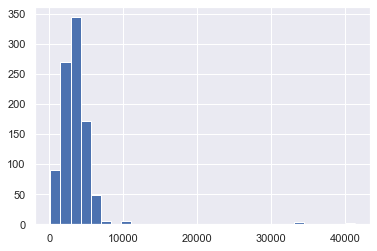

In [250]:
df2.loc[df2['Income']=='<=50K'].loc[df2['capital-gain_cat']==1 ]['capital-gain'].hist(bins=30)

In [251]:
df2[df2['capital-gain_cat']==1]['capital-gain'].describe()

count     2537.000000
mean     12981.855341
std      22315.281496
min        114.000000
25%       3464.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

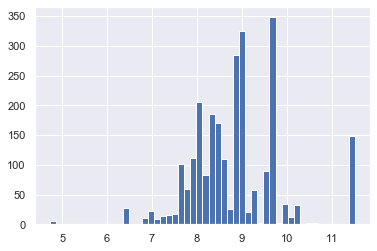

In [252]:
np.log(df2[df2['capital-gain_cat']==1]['capital-gain']).hist(bins=50)

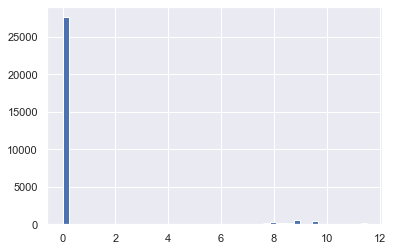

In [253]:
np.log(df['capital-gain']+1).hist(bins=50)

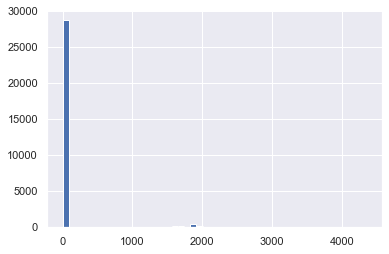

In [254]:
df['capital-loss'].hist(bins=50)

In [90]:
df['capital-loss'].describe()

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

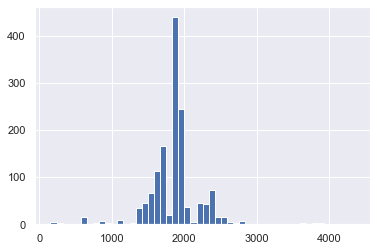

In [255]:
df[df['capital-loss']>0]['capital-loss'].hist(bins=50)

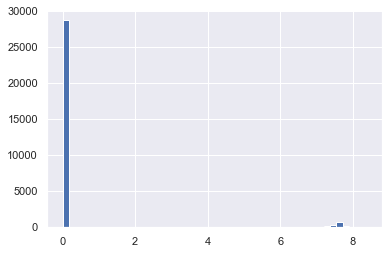

In [256]:
np.log(df['capital-loss']+1).hist(bins=50)

hours-per-week
count    30161.000000
mean        40.931269
std         11.980182
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


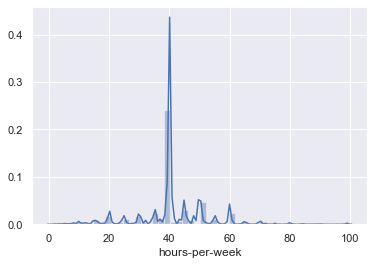

When income >50K, the distribution of  hours-per-week


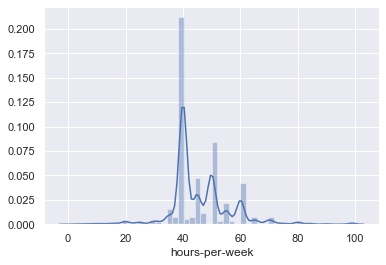

When income <=50K, the distribution of  hours-per-week


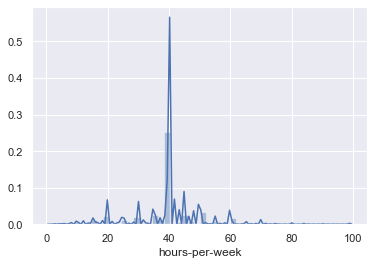

In [257]:
num_dist_plot(df, 'hours-per-week')

### Categorical Features

In [258]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1278
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [259]:
df.groupby(['workclass','Income']).count()['age']

workclass         Income
Federal-gov       <=50K       578
                  >50K        365
Local-gov         <=50K      1458
                  >50K        609
Private           <=50K     17410
                  >50K       4876
Self-emp-inc      <=50K       474
                  >50K        600
Self-emp-not-inc  <=50K      1785
                  >50K        714
State-gov         <=50K       934
                  >50K        344
Without-pay       <=50K        14
Name: age, dtype: int64

In [260]:
df.groupby(['education','Income']).count()['age']

education     Income
10th          <=50K      761
              >50K        59
11th          <=50K      989
              >50K        59
12th          <=50K      348
              >50K        29
1st-4th       <=50K      145
              >50K         6
5th-6th       <=50K      276
              >50K        12
7th-8th       <=50K      522
              >50K        35
9th           <=50K      430
              >50K        25
Assoc-acdm    <=50K      752
              >50K       256
Assoc-voc     <=50K      963
              >50K       344
Bachelors     <=50K     2917
              >50K      2126
Doctorate     <=50K       95
              >50K       280
HS-grad       <=50K     8223
              >50K      1617
Masters       <=50K      709
              >50K       918
Preschool     <=50K       45
Prof-school   <=50K      136
              >50K       406
Some-college  <=50K     5342
              >50K      1336
Name: age, dtype: int64

In [261]:
df.groupby(['marital-status','Income']).count()['age']


marital-status         Income
Divorced               <=50K     3762
                       >50K       452
Married-AF-spouse      <=50K       11
                       >50K        10
Married-civ-spouse     <=50K     7666
                       >50K      6399
Married-spouse-absent  <=50K      339
                       >50K        31
Never-married          <=50K     9255
                       >50K       470
Separated              <=50K      873
                       >50K        66
Widowed                <=50K      747
                       >50K        80
Name: age, dtype: int64

In [262]:
df.groupby(['occupation','Income']).count()['age']

occupation         Income
Adm-clerical       <=50K     3222
                   >50K       498
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3122
                   >50K       908
Exec-managerial    <=50K     2055
                   >50K      1937
Farming-fishing    <=50K      874
                   >50K       115
Handlers-cleaners  <=50K     1267
                   >50K        83
Machine-op-inspct  <=50K     1721
                   >50K       245
Other-service      <=50K     3080
                   >50K       132
Priv-house-serv    <=50K      142
                   >50K         1
Prof-specialty     <=50K     2227
                   >50K      1811
Protective-serv    <=50K      434
                   >50K       210
Sales              <=50K     2614
                   >50K       970
Tech-support       <=50K      634
                   >50K       278
Transport-moving   <=50K     1253
                   >50K       319
Name: age, dtype: int6

In [123]:
df_relaship = df[['relationship','age']].groupby(['relationship']).count()
df_relaship

,age
relationship,
Husband,13193
Not-in-family,8304
Other-relative,981
Own-child,5068
Unmarried,3446
Wife,1568


In [124]:
# df.groupby(['relationship','Income']).count()['age']
df_relaship_income = df[['relationship','Income','age']].groupby(['relationship','Income']).count()
df_relaship_income

age
relationship    Income      
 Husband        <=50K   7275
                >50K    5918
 Not-in-family  <=50K   7448
                >50K     856
 Other-relative <=50K    944
                >50K      37
 Own-child      <=50K   5001
                >50K      67
 Unmarried      <=50K   3228
                >50K     218
 Wife           <=50K    823
                >50K     745

In [133]:
df_relaship_income_pct = df_relaship_income.div(df_relaship, level='relationship') * 100
df_relaship_income_pct.reset_index().pivot(index='relationship', columns='Income', values='age')

Income,<=50K,>50K
relationship,,
Husband,55.142879,44.857121
Not-in-family,89.691715,10.308285
Other-relative,96.228338,3.771662
Own-child,98.677979,1.322021
Unmarried,93.673825,6.326175
Wife,52.487245,47.512755


In [129]:
df_relaship_income2 = df_relaship_income.reset_index()
df_relaship_income2.pivot(index='relationship', columns='Income', values='age')

Income,<=50K,>50K
relationship,,
Husband,7275,5918
Not-in-family,7448,856
Other-relative,944,37
Own-child,5001,67
Unmarried,3228,218
Wife,823,745


In [137]:
df_relaship = df[['relationship','age']].groupby(['relationship']).count()
df_relaship
df_relaship_income = df[['relationship','Income','age']].groupby(['relationship','Income']).count()
df_relaship_income
df_relaship_income.reset_index().pivot(index='relationship', columns='Income', values='age')

df_relaship_income_pct = df_relaship_income.div(df_relaship, level='relationship') * 100
df_relaship_income_pct_pivot = df_relaship_income_pct.reset_index().pivot(index='relationship', columns='Income', values='age')
df_relaship_income_pct_pivot

Income,<=50K,>50K
relationship,,
Husband,55.142879,44.857121
Not-in-family,89.691715,10.308285
Other-relative,96.228338,3.771662
Own-child,98.677979,1.322021
Unmarried,93.673825,6.326175
Wife,52.487245,47.512755


In [142]:
df_race = df[['race','age']].groupby(['race']).count()
# df_race
df_race_income = df[['race','Income','age']].groupby(['race','Income']).count()
# df_race_income
df_race_income_pivot = df_race_income.reset_index().pivot(index='race', columns='Income', values='age')
# df_race_income_pivot
df_race_income_pct = df_race_income.div(df_race, level='race') * 100
df_race_income_pct_pivot = df_race_income_pct.reset_index().pivot(index='race', columns='Income', values='age')
df_race_income_pct_pivot

Income,<=50K,>50K
race,,
Amer-Indian-Eskimo,88.424437,11.575563
Asian-Pac-Islander,73.435996,26.564004
Black,87.612036,12.387964
Other,90.774908,9.225092
White,74.413086,25.586914


In [143]:
df_race_income_pivot

Income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20698,7117


In [144]:
df_sex = df[['sex','age']].groupby(['sex']).count()
# df_sex
df_sex_income = df[['sex','Income','age']].groupby(['sex','Income']).count()
# df_sex_income
df_sex_income_pivot = df_sex_income.reset_index().pivot(index='sex', columns='Income', values='age')
# df_sex_income_pivot
df_sex_income_pct = df_sex_income.div(df_sex, level='sex') * 100
df_sex_income_pct_pivot = df_sex_income_pct.reset_index().pivot(index='sex', columns='Income', values='age')
df_sex_income_pct_pivot


Income,<=50K,>50K
sex,,
Female,89.053941,10.946059
Male,69.424939,30.575061


In [145]:
df_sex_income_pivot

Income,<=50K,>50K
sex,,
Female,9592,1179
Male,15127,6662


In [148]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income']

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [338]:
df_native_country = df[['native-country','age']].groupby(['native-country']).count()
# df_native_country
df_native_country_income = df[['native-country','Income','age']].groupby(['native-country','Income']).count()
# df_native_country_income
df_native_country_income_pivot = df_native_country_income.reset_index().pivot(index='native-country', columns='Income', values='age')
# df_native_country_income_pivot
df_native_country_income_pct = df_native_country_income.div(df_native_country, level='native-country') * 100
df_native_country_income_pct_pivot = df_native_country_income_pct.reset_index().pivot(index='native-country', columns='Income', values='age')
df_native_country_income_pct_pivot


Income,<=50K,>50K
native-country,,
Cambodia,61.111111,38.888889
Canada,66.355140,33.644860
China,70.588235,29.411765
Columbia,96.428571,3.571429
Cuba,72.826087,27.173913
Dominican-Republic,97.014925,2.985075
Ecuador,85.185185,14.814815
El-Salvador,91.000000,9.000000
England,65.116279,34.883721


In [150]:
df_native_country_income_pivot

Income,<=50K,>50K
native-country,,
?,437.0,146.0
Cambodia,12.0,7.0
Canada,82.0,39.0
China,55.0,20.0
Columbia,57.0,2.0
Cuba,70.0,25.0
Dominican-Republic,68.0,2.0
Ecuador,24.0,4.0
El-Salvador,97.0,9.0


In [151]:
df['native-country'].value_counts(normalize=True)

 United-States                 0.895854
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004208
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003256
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [156]:
l = [1 if x == 'United-States' else 0 for x in df['native-country'].str.strip()]
# values, counts = np.unique(l, return_counts=True)
print(np.unique(l, return_counts=True))

(array([0, 1]), array([ 3391, 29169], dtype=int64))


In [158]:
df['native-country2']=[1 if x == 'United-States' else 0 for x in df['native-country'].str.strip()]


In [159]:
# df_native_country
df_native_country2_income = df[['native-country2','Income','age']].groupby(['native-country2','Income']).count()


In [161]:
# df_native_country_income
df_native_country2_income_pivot = df_native_country2_income.reset_index().pivot(index='native-country2', columns='Income', values='age')

In [162]:
df_native_country2_income_pivot

Income,<=50K,>50K
native-country2,,
0,2721,670
1,21998,7171


In [165]:
df_native_country2 = df[['native-country2','age']].groupby(['native-country2']).count()


In [168]:
df_native_country2_income_pct = df_native_country2_income.div(df_native_country2, level='native-country2') * 100
df_native_country2_income_pct_pivot = df_native_country2_income_pct.reset_index().pivot(index='native-country2', columns='Income', values='age')
df_native_country2_income_pct_pivot

Income,<=50K,>50K
native-country2,,
0,80.241817,19.758183
1,75.415681,24.584319


In [264]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

## Imbalanced Class

In [265]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Model 1
1. Data Preprocessing for numerical columns
2. Data Preprocessing for categorical Columns
3. Use the currend dataset directly

In [266]:
num_cols

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [267]:
df_processed = df.copy()
df_processed.shape

(30161, 14)

In [268]:
df_processed.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


numberical columns using minmaxscaler

In [269]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])
df_processed.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,<=50K
5,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica,<=50K
6,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States,>50K
7,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.140841,0.0,0.500000,United-States,>50K
8,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.051781,0.0,0.397959,United-States,>50K
9,0.273973,Private,Some-college,0.600000,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.000000,0.0,0.806122,United-States,>50K


In [327]:
df_processed.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,0.293670,0.608081,0.010920,0.020288,0.407462
std,0.179930,0.169999,0.074065,0.092816,0.122247
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


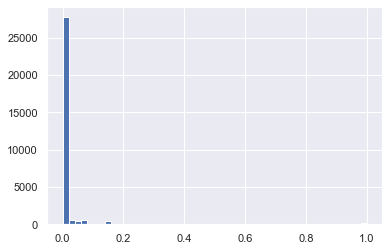

In [328]:
df_processed['capital-gain'].hist(bins=50)

Label and feature

In [270]:
y = df_processed['Income'].apply(lambda x: 0 if x == "<=50K" else 1)
X_scaled = df_processed.drop('Income', axis = 1)

In [271]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30161 non-null  float64
 1   workclass       30161 non-null  object 
 2   education       30161 non-null  object 
 3   education-num   30161 non-null  float64
 4   marital-status  30161 non-null  object 
 5   occupation      30161 non-null  object 
 6   relationship    30161 non-null  object 
 7   race            30161 non-null  object 
 8   sex             30161 non-null  object 
 9   capital-gain    30161 non-null  float64
 10  capital-loss    30161 non-null  float64
 11  hours-per-week  30161 non-null  float64
 12  native-country  30161 non-null  object 
dtypes: float64(5), object(8)
memory usage: 4.5+ MB


In [272]:
X_scaled_dummies = pd.get_dummies(X_scaled)
X_scaled_dummies.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.493151,0.400000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.150685,0.800000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.866667,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Another way to encode the labels

In [273]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# y_encoded = pd.Series(encoder.fit_transform(df_processed['Income']))
# y_encoded

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Length: 30161, dtype: int32

Split train-test set

In [275]:
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies, y, test_size = 0.2, random_state = 123)

print("Train set size {}".format(X_train.shape))
print("Test set size {}".format(X_test.shape))


Train set size (24128, 103)
Test set size (6033, 103)


In [282]:
values, counts = np.unique(y_train, return_counts=True)
print(values,counts)
print("percentage of label 1: {}".format(counts[1]/y_train.size))

[0 1] [18091  6037]
percentage of label 1: 0.25020722811671087


In [283]:
values, counts = np.unique(y_test, return_counts=True)
print(values,counts)
print("percentage of label 1: {}".format(counts[1]/y_test.size))

[0 1] [4562 1471]
percentage of label 1: 0.24382562572517819


Create models without treating the imbalance

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report, precision_score, recall_score

In [285]:
clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

In [286]:
# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
confusion_matrix(y_test,y_test_pred)

accuracy score:  0.8543013426156141

 confusion matrix: 


array([[4264,  298],
       [ 581,  890]], dtype=int64)

In [288]:
print(classification_report(y_test,y_test_pred))

precision    recall  f1-score   support

           0       0.88      0.93      0.91      4562
           1       0.75      0.61      0.67      1471

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



The overall accuracy seems to be okay. But can we improve the performance?

In [300]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8543013426156141

 confusion matrix: 
[[4276  286]
 [ 593  878]]

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4562
           1       0.75      0.60      0.67      1471

    accuracy                           0.85      6033
   macro avg       0.82      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



### Treat the imbalance problem
1. imblearn package with over sampling

In [301]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)


print("resample class weights: {}".format(y_resampled.value_counts()))


resample class weights: 1    18091
0    18091
Name: Income, dtype: int64


In [304]:
clf = LogisticRegression().fit(X_resampled, y_resampled)


In [305]:
# predict 
y_test_pred = clf.predict(X_test)

In [306]:
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8082214486988232

 confusion matrix: 
[[3629  933]
 [ 224 1247]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4562
           1       0.57      0.85      0.68      1471

    accuracy                           0.81      6033
   macro avg       0.76      0.82      0.77      6033
weighted avg       0.85      0.81      0.82      6033



In [307]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8072269186142881

 confusion matrix: 
[[3610  952]
 [ 211 1260]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4562
           1       0.57      0.86      0.68      1471

    accuracy                           0.81      6033
   macro avg       0.76      0.82      0.77      6033
weighted avg       0.85      0.81      0.82      6033



In [308]:
from imblearn.over_sampling import SMOTE, ADASYN
ros = SMOTE(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
clf = LogisticRegression().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8120338140228742

 confusion matrix: 
[[3724  838]
 [ 296 1175]]

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4562
           1       0.58      0.80      0.67      1471

    accuracy                           0.81      6033
   macro avg       0.76      0.81      0.77      6033
weighted avg       0.84      0.81      0.82      6033



In [309]:
ros = ADASYN(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
clf = LogisticRegression().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8012597381070777

 confusion matrix: 
[[3618  944]
 [ 255 1216]]

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4562
           1       0.56      0.83      0.67      1471

    accuracy                           0.80      6033
   macro avg       0.75      0.81      0.76      6033
weighted avg       0.84      0.80      0.81      6033



In [310]:
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, KMeansSMOTE

print("\nBorderlineSMOTE")
ros = BorderlineSMOTE(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
clf = LogisticRegression().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))





BorderlineSMOTE
accuracy score:  0.7971158627548484

 confusion matrix: 
[[3584  978]
 [ 246 1225]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.79      0.85      4562
           1       0.56      0.83      0.67      1471

    accuracy                           0.80      6033
   macro avg       0.75      0.81      0.76      6033
weighted avg       0.84      0.80      0.81      6033



In [311]:
print("\nSVMSMOTE")
ros = SVMSMOTE(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
clf = LinearSVC().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))


SVMSMOTE
accuracy score:  0.8049063484170396

 confusion matrix: 
[[3647  915]
 [ 262 1209]]

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4562
           1       0.57      0.82      0.67      1471

    accuracy                           0.80      6033
   macro avg       0.75      0.81      0.77      6033
weighted avg       0.84      0.80      0.82      6033



In [316]:

print("\nKMeansSMOTE")
ros = KMeansSMOTE(cluster_balance_threshold =0.4,random_state=123)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)



KMeansSMOTE


In [317]:
clf = LinearSVC().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.825957235206365

 confusion matrix: 
[[3913  649]
 [ 401 1070]]

Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      4562
           1       0.62      0.73      0.67      1471

    accuracy                           0.83      6033
   macro avg       0.76      0.79      0.78      6033
weighted avg       0.84      0.83      0.83      6033



## imblearn package for Under-Sampling

In [319]:
from imblearn.under_sampling import RandomUnderSampler, AllKNN,CondensedNearestNeighbour

print("\RandomUnderSampler")
rus = RandomUnderSampler(random_state=123)
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)
clf = LogisticRegression().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))


\RandomUnderSampler
accuracy score:  0.8055693684733963

 confusion matrix: 
[[3629  933]
 [ 240 1231]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4562
           1       0.57      0.84      0.68      1471

    accuracy                           0.81      6033
   macro avg       0.75      0.82      0.77      6033
weighted avg       0.85      0.81      0.82      6033



In [321]:
print("\nAllKNN")
rus = AllKNN()
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)
clf = LogisticRegression().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))


AllKNN
accuracy score:  0.799602187966186

 confusion matrix: 
[[3575  987]
 [ 222 1249]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.78      0.86      4562
           1       0.56      0.85      0.67      1471

    accuracy                           0.80      6033
   macro avg       0.75      0.82      0.76      6033
weighted avg       0.85      0.80      0.81      6033



In [322]:
print("\nCondensedNearestNeighbour")
rus = CondensedNearestNeighbour(random_state=123)
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)
clf = LogisticRegression().fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))



CondensedNearestNeighbour


KeyboardInterrupt: 

## imblearn.ensemble

In [323]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier(max_depth=10, random_state=0).fit(X_resampled, y_resampled)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.7550140891761976

 confusion matrix: 
[[3199 1363]
 [ 115 1356]]

Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      4562
           1       0.50      0.92      0.65      1471

    accuracy                           0.76      6033
   macro avg       0.73      0.81      0.73      6033
weighted avg       0.85      0.76      0.77      6033



## Tune class weight in Logistic Regression model

In [324]:
clf = LogisticRegression(class_weight={0:0.75, 1:0.25}).fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

In [325]:
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.817503729487817

 confusion matrix: 
[[4500   62]
 [1039  432]]

Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4562
           1       0.87      0.29      0.44      1471

    accuracy                           0.82      6033
   macro avg       0.84      0.64      0.67      6033
weighted avg       0.83      0.82      0.78      6033



In [326]:
clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8543013426156141

 confusion matrix: 
[[4264  298]
 [ 581  890]]

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4562
           1       0.75      0.61      0.67      1471

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



## Data Preprocessing

In [329]:
df_processed2 = df.copy()
df_processed2.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [330]:
df_processed2['capital-gain']=np.log(df_processed2['capital-gain']+1) 
df_processed2['capital-loss']=np.log(df_processed2['capital-loss']+1) 


In [331]:
scaler = MinMaxScaler()
df_processed2[num_cols] = scaler.fit_transform(df_processed2[num_cols])
df_processed2.head(10)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,<=50K
5,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica,<=50K
6,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States,>50K
7,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.829751,0.0,0.500000,United-States,>50K
8,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.742849,0.0,0.397959,United-States,>50K
9,0.273973,Private,Some-college,0.600000,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.000000,0.0,0.806122,United-States,>50K


In [332]:
y = df_processed2['Income'].apply(lambda x: 0 if x == "<=50K" else 1)
X_scaled = df_processed2.drop('Income', axis = 1)


In [333]:
X_scaled_dummies = pd.get_dummies(X_scaled)
X_scaled_dummies.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.493151,0.400000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.150685,0.800000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.866667,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [334]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies, y, test_size = 0.2, random_state = 123)

In [335]:
clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))


accuracy score:  0.8489971821647605

 confusion matrix: 
[[4240  322]
 [ 589  882]]

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4562
           1       0.73      0.60      0.66      1471

    accuracy                           0.85      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033



Preprocess categorical columns

In [336]:
df_processed3 = df.copy()
df_processed3.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [337]:
scaler = MinMaxScaler()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])


In [339]:
df_processed['native-country']=df_processed['native-country'].str.strip()
df_processed['native-country'] =["USA" if x =='United-States' else "Other" for x in df_processed['native-country']]

In [340]:
df_processed['native-country'].value_counts()

USA      27503
Other     2658
Name: native-country, dtype: int64

In [341]:
y = df_processed['Income'].apply(lambda x: 0 if x == "<=50K" else 1)
X_scaled = df_processed.drop('Income', axis = 1)

X_scaled_dummies = pd.get_dummies(X_scaled)
X_scaled_dummies.head()

X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies, y, test_size = 0.2, random_state = 123)

clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))


accuracy score:  0.854135587601525

 confusion matrix: 
[[4265  297]
 [ 583  888]]

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4562
           1       0.75      0.60      0.67      1471

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



## PCA Analysis

In [342]:
X_scaled_dummies.shape

(30161, 64)

In [343]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_scaled_dummies_pca = pca.fit_transform(X_scaled_dummies)
X_scaled_dummies_pca.shape

(30161, 30)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies_pca, y, test_size = 0.2, random_state = 123)

clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8301011105585944

 confusion matrix: 
[[4203  359]
 [ 666  805]]

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4562
           1       0.69      0.55      0.61      1471

    accuracy                           0.83      6033
   macro avg       0.78      0.73      0.75      6033
weighted avg       0.82      0.83      0.82      6033



In [347]:
pca = PCA(n_components=10)
X_scaled_dummies_pca = pca.fit_transform(X_scaled_dummies)
X_scaled_dummies_pca.shape
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies_pca, y, test_size = 0.2, random_state = 123)

clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8257914801922758

 confusion matrix: 
[[4286  276]
 [ 775  696]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4562
           1       0.72      0.47      0.57      1471

    accuracy                           0.83      6033
   macro avg       0.78      0.71      0.73      6033
weighted avg       0.81      0.83      0.81      6033



### Feature importance

In [349]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_scaled_dummies_k30 = SelectKBest(chi2, k=30).fit_transform(X_scaled_dummies, y)

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies_k30, y, test_size = 0.2, random_state = 123)

clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8499917122492956

 confusion matrix: 
[[4273  289]
 [ 616  855]]

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4562
           1       0.75      0.58      0.65      1471

    accuracy                           0.85      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [351]:
X_scaled_dummies_k30 = SelectKBest(chi2, k=20).fit_transform(X_scaled_dummies, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies_k30, y, test_size = 0.2, random_state = 123)

clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))

accuracy score:  0.8481684070943146

 confusion matrix: 
[[4291  271]
 [ 645  826]]

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4562
           1       0.75      0.56      0.64      1471

    accuracy                           0.85      6033
   macro avg       0.81      0.75      0.77      6033
weighted avg       0.84      0.85      0.84      6033



In [ ]:
X_scaled_dummies_k30 = SelectKBest(chi2, k=15).fit_transform(X_scaled_dummies, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dummies_k30, y, test_size = 0.2, random_state = 123)

clf = LogisticRegression().fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

# print result
print("accuracy score: ", accuracy_score(y_test,y_test_pred))
print("\n confusion matrix: ")
print(confusion_matrix(y_test,y_test_pred))
print("\nClassification report: ")
print(classification_report(y_test,y_test_pred))